In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('../../Datasets/shopping-data.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [7]:
ohetransform = ohe.fit_transform(df[['Genre']])

In [8]:
ohetransform

,Genre_Female,Genre_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,1.0,0.0
197,0.0,1.0
198,0.0,1.0


In [10]:
df2 = pd.concat([df.iloc[:,2:], ohetransform], axis=1)

In [11]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0


In [12]:
scaler = StandardScaler()

In [13]:
df_scaled = scaler.fit_transform(df2)

In [16]:
df_scaled

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

### Clustering

In [17]:
Z = linkage(df_scaled, method='ward')

In [18]:
Z

array([[6.50000000e+01, 6.80000000e+01, 7.17666897e-02, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 7.17666897e-02, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 9.00803899e-02, 2.00000000e+00],
       [1.14000000e+02, 1.15000000e+02, 1.05730374e-01, 2.00000000e+00],
       [6.00000000e+01, 7.00000000e+01, 1.20910138e-01, 2.00000000e+00],
       [1.17000000e+02, 1.19000000e+02, 1.30409100e-01, 2.00000000e+00],
       [1.12000000e+02, 1.21000000e+02, 1.38349565e-01, 2.00000000e+00],
       [4.80000000e+01, 4.90000000e+01, 1.43533379e-01, 2.00000000e+00],
       [1.00000000e+02, 1.05000000e+02, 1.48690768e-01, 2.00000000e+00],
       [1.47000000e+02, 1.59000000e+02, 1.53511726e-01, 2.00000000e+00],
       [8.40000000e+01, 8.70000000e+01, 1.55855895e-01, 2.00000000e+00],
       [4.60000000e+01, 5.00000000e+01, 1.56659188e-01, 2.00000000e+00],
       [1.10000000e+01, 1.90000000e+01, 1.57536024e-01, 2.00000000e+00],
       [9.60000000e+01, 1.01000000e+02, 1.67142352e

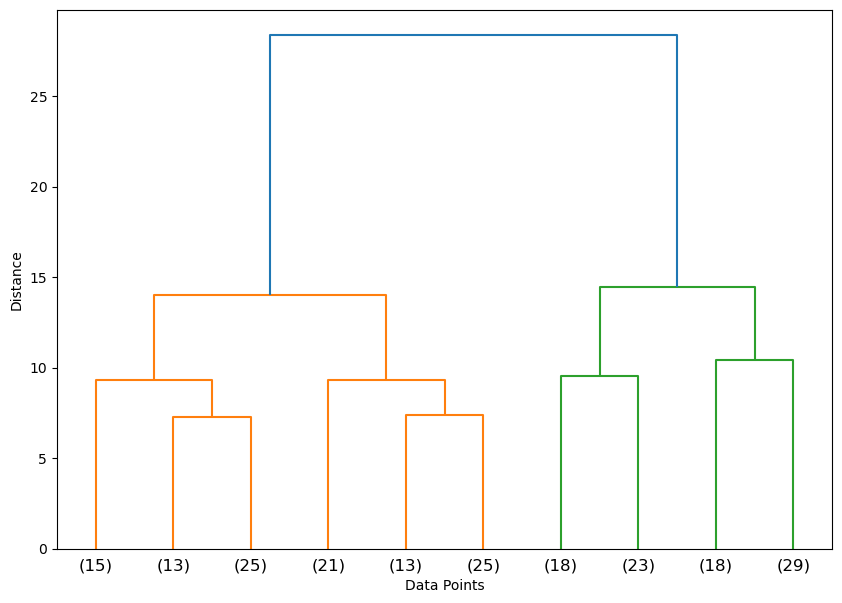

In [21]:
plt.figure(figsize=(10,7))
dendrogram(Z, truncate_mode='lastp',p=10)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [40]:
clusters = fcluster(Z, t=4, criterion='maxclust')

In [41]:
df['clusters'] = clusters

In [42]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


### PCA for visualization

In [43]:
pca = PCA(n_components=2)

In [44]:
p_components = pca.fit_transform(df_scaled)

In [45]:
p_components

array([[-1.32190829e+00,  7.82593850e-01],
       [-1.15001870e+00,  1.81681292e+00],
       [ 1.32003278e+00, -6.07360185e-01],
       [ 1.61384934e+00,  1.15995935e+00],
       [ 1.37654369e+00, -2.34456765e-01],
       [ 1.61503894e+00,  1.18630229e+00],
       [ 1.18676491e+00, -1.34840967e+00],
       [ 1.68466941e+00,  1.62589038e+00],
       [-1.87798964e+00, -2.41946410e+00],
       [ 1.52333871e+00,  6.86323906e-01],
       [-1.85403933e+00, -2.27207653e+00],
       [ 1.60223657e+00,  1.16596003e+00],
       [ 1.02590985e+00, -2.24540259e+00],
       [ 1.59405689e+00,  1.12399330e+00],
       [-1.60610643e+00, -7.99600664e-01],
       [-1.18162771e+00,  1.73032429e+00],
       [ 1.30873721e+00, -5.55017103e-01],
       [-1.22590297e+00,  1.48254749e+00],
       [-1.67023099e+00, -1.10519314e+00],
       [ 1.58645474e+00,  1.15286177e+00],
       [-1.50142275e+00, -9.19916993e-02],
       [-1.24542357e+00,  1.43263174e+00],
       [ 1.06892774e+00, -1.89961566e+00],
       [-1.

In [46]:
P_df = pd.DataFrame(data = p_components, columns=['PCA1', 'PCA2'])

In [47]:
P_df

,PCA1,PCA2
0,-1.321908,0.782594
1,-1.150019,1.816813
2,1.320033,-0.607360
3,1.613849,1.159959
4,1.376544,-0.234457
...,...,...
195,1.227359,0.976973
196,0.895962,-0.877785
197,-1.588228,1.465029
198,-1.871134,-0.008680


<Axes: xlabel='PCA1', ylabel='PCA2'>

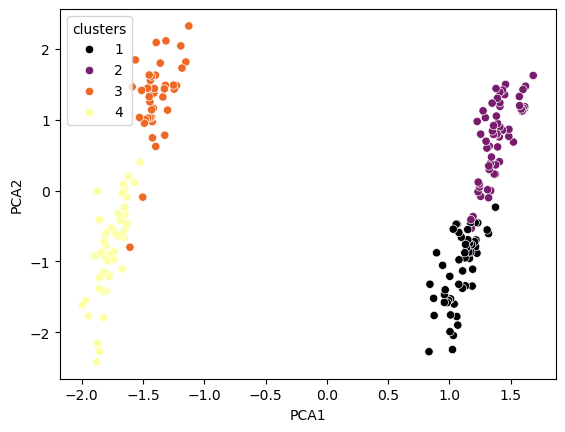

In [48]:
sns.scatterplot(x = P_df['PCA1'], y=P_df['PCA2'], hue=df['clusters'], palette='inferno')

In [49]:
pca.explained_variance_

array([2.03623616, 1.31604164])

In [50]:
pca.explained_variance_ratio_

array([0.405211  , 0.26189229])

### Finding best number of components for pca

In [51]:
pca_full = PCA()

In [52]:
p_all = pca_full.fit_transform(df_scaled)

In [56]:
p_all

array([[-1.32190829e+00,  7.82593850e-01, -1.91316957e+00,
        -1.32962732e+00,  2.83214861e-17],
       [-1.15001870e+00,  1.81681292e+00, -2.00280489e+00,
        -7.58488083e-02,  2.83214861e-17],
       [ 1.32003278e+00, -6.07360185e-01, -1.54554081e+00,
        -2.17683532e+00,  1.63989548e-16],
       [ 1.61384934e+00,  1.15995935e+00, -1.69845016e+00,
        -7.66958318e-02,  1.63989548e-16],
       [ 1.37654369e+00, -2.34456765e-01, -1.54614161e+00,
        -6.85314357e-01,  1.63989548e-16],
       [ 1.61503894e+00,  1.18630229e+00, -1.66186804e+00,
        -1.54675701e-01,  1.63989548e-16],
       [ 1.18676491e+00, -1.34840967e+00, -1.41527543e+00,
        -1.41473502e+00,  1.63989548e-16],
       [ 1.68466941e+00,  1.62589038e+00, -1.66185919e+00,
         3.90141765e-01,  1.63989548e-16],
       [-1.87798964e+00, -2.41946410e+00, -1.51513053e+00,
        -3.14093312e-02,  2.83214861e-17],
       [ 1.52333871e+00,  6.86323906e-01, -1.54778664e+00,
         1.42256698e-01

In [57]:
c_variance = np.cumsum(pca_full.explained_variance_ratio_)

In [58]:
c_variance

array([0.405211  , 0.66710328, 0.86544887, 1.        , 1.        ])

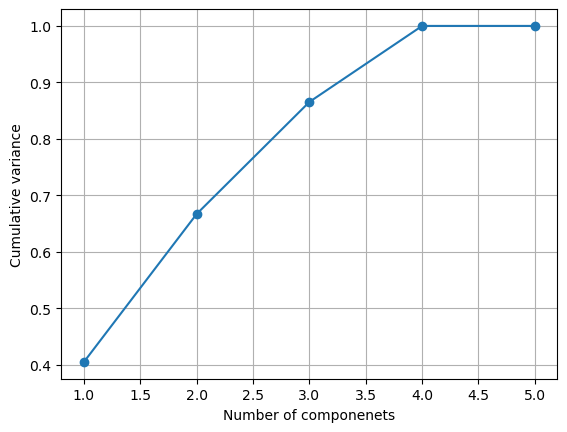

In [61]:
plt.plot(range(1,len(c_variance)+1), c_variance, marker='o')
plt.xlabel('Number of componenets')
plt.ylabel('Cumulative variance')
plt.grid(True)

In [62]:
######